## K-Means
A clustering algorithm that aims at grouping a set of data points lying close to a few **cluster centers**.
It is by far one of the most popular and basic clustering algorithm in machine learning.

In the following, we illustrate how it works using synthetically generated data.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

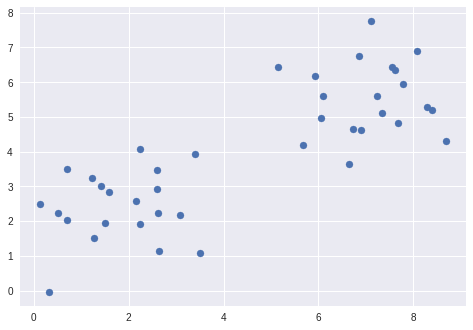

In [52]:
# generate test data
center_1 = np.array([7, 5])
data_1 = np.random.randn(20, 2) + center_1[None, :]
center_2 = np.array([2, 2])
data_2 = np.random.randn(20, 2) + center_2[None, :]

data = np.concatenate((data_1, data_2), axis=0)

plt.scatter(data[:, 0], data[:, 1])

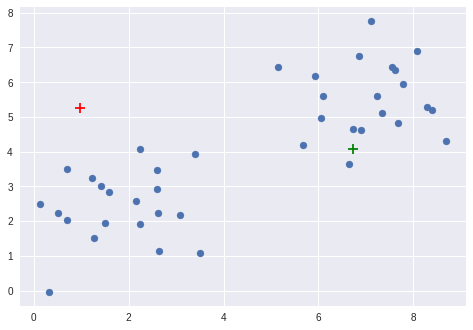

In [55]:
# K-means clustering starts here
# initialize centers
kmeans_center_1 = np.random.rand(2) * 8
kmeans_center_2 = np.random.rand(2) * 8

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(kmeans_center_1[0], kmeans_center_1[1], marker='+', color='r', s=100)
plt.scatter(kmeans_center_2[0], kmeans_center_2[1], marker='+', color='g', s=100)

# assign data to centers
dist_1 = np.linalg.norm(data - kmeans_center_1[None, :], axis=1)
dist_2 = np.linalg.norm(data - kmeans_center_2[None, :], axis=1)
assignment = np.where(dist_1 < dist_2, 1, 2)

plt.scatter(data[assignment == 1, 0], data[assignment == 1, 1], color='r')
plt.scatter(data[assignment == 2, 0], data[assignment == 2, 1], color='g')

# update centers
kmeans_center_1 = np.mean(data[assignment == 1, :], axis=0)
kmeans_center_2 = np.mean(data[assignment == 2, :], axis=0)

plt.scatter(kmeans_center_1[0], kmeans_center_1[1], marker='+', color='r', s=100)
plt.scatter(kmeans_center_2[0], kmeans_center_2[1], marker='+', color='g', s=100)

# You can repeat the above two steps to see the convergence procedure.

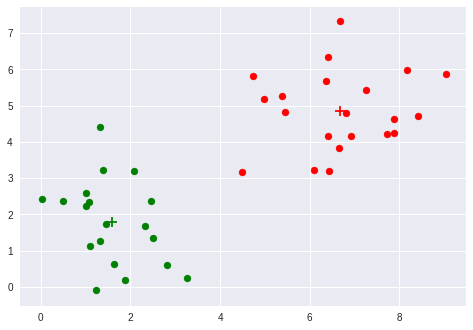

In [10]:
# Alternatively, you can use existing toolboxes
from sklearn.cluster import KMeans
# K-Means clustering
kmeans = KMeans(n_clusters=2).fit(data)

plt.scatter(data[kmeans.labels_ == 0, 0], data[kmeans.labels_ == 0, 1], color='r')
plt.scatter(data[kmeans.labels_ == 1, 0], data[kmeans.labels_ == 1, 1], color='g')

plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], marker='+', color='r', s=100)
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1],  marker='+', color='g', s=100)

## Spectral Clustering

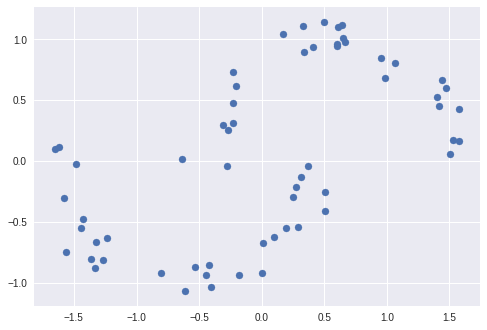

In [56]:
# generate test data
n_samples_per_subspace = 30
n_samples = 60
angle_1 = np.random.rand(n_samples_per_subspace, 1) * 3.14
data_1 = np.concatenate((np.cos(angle_1) + 0.6, np.sin(angle_1)), axis=1)

angle_2 = np.random.rand(n_samples_per_subspace, 1) * 3.14 + 3.14
data_2 = np.concatenate((np.cos(angle_2) - 0.6, np.sin(angle_2)), axis=1)

data = np.concatenate((data_1, data_2), axis=0) + np.random.randn(n_samples, 2) * 0.1

plt.scatter(data[:, 0], data[:, 1])

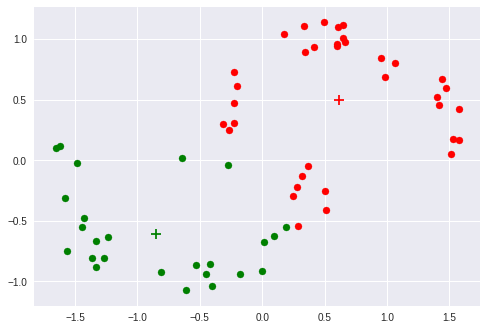

In [57]:
# K-Means clustering
kmeans = KMeans(n_clusters=2).fit(data)

# plot data labels
plt.scatter(data[kmeans.labels_ == 0, 0], data[kmeans.labels_ == 0, 1], color='r')
plt.scatter(data[kmeans.labels_ == 1, 0], data[kmeans.labels_ == 1, 1], color='g')
# plot cluster centers
plt.scatter(kmeans.cluster_centers_[0, 0], kmeans.cluster_centers_[0, 1], marker='+', color='r', s=100)
plt.scatter(kmeans.cluster_centers_[1, 0], kmeans.cluster_centers_[1, 1],  marker='+', color='g', s=100)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


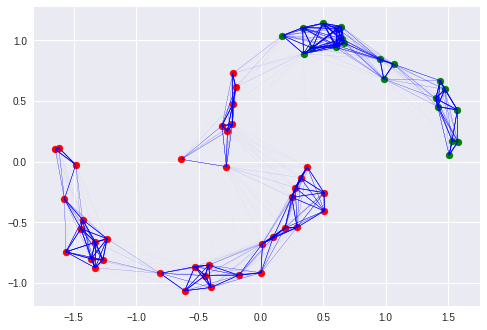

In [58]:
# Spectral clustering
from sklearn.cluster import SpectralClustering
spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=10).fit(data)

# plot data labels
plt.scatter(data[spectral.labels_ == 0, 0], data[spectral.labels_ == 0, 1], color='r')
plt.scatter(data[spectral.labels_ == 1, 0], data[spectral.labels_ == 1, 1], color='g')
# plot data affinity
for i in range(n_samples):
  for j in range(n_samples):
    if spectral.affinity_matrix_[i,j] > 0:
      plt.plot(np.array([data[i,0], data[j,0]]), np.array([data[i,1], data[j,1]]), linewidth=spectral.affinity_matrix_[i,j], color='b')